In [4]:
pip install pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load dataset
df=pd.read_csv("netflix_titles.csv")

In [21]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [20]:
 
df = df.dropna(subset=['duration', 'rating','date_added'])
df['director']=df["director"].fillna("Unknown")
df['cast']=df["cast"].fillna("Unknown")
df['country']=df["country"].fillna(df["country"].mode()[0])


##  content type distribution

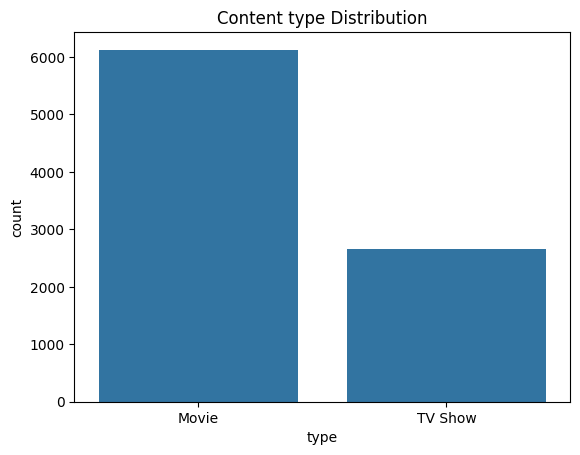

In [41]:
# countplot for content type distribution

sns.countplot(x=df["type"])

plt.title("Content type Distribution")
plt.show()

## Top 10 Countries by Content Count

In [34]:
top_10=df["country"].value_counts().head(10)
top_10.values

array([3638,  972,  418,  243,  199,  181,  145,  124,  110,  106])

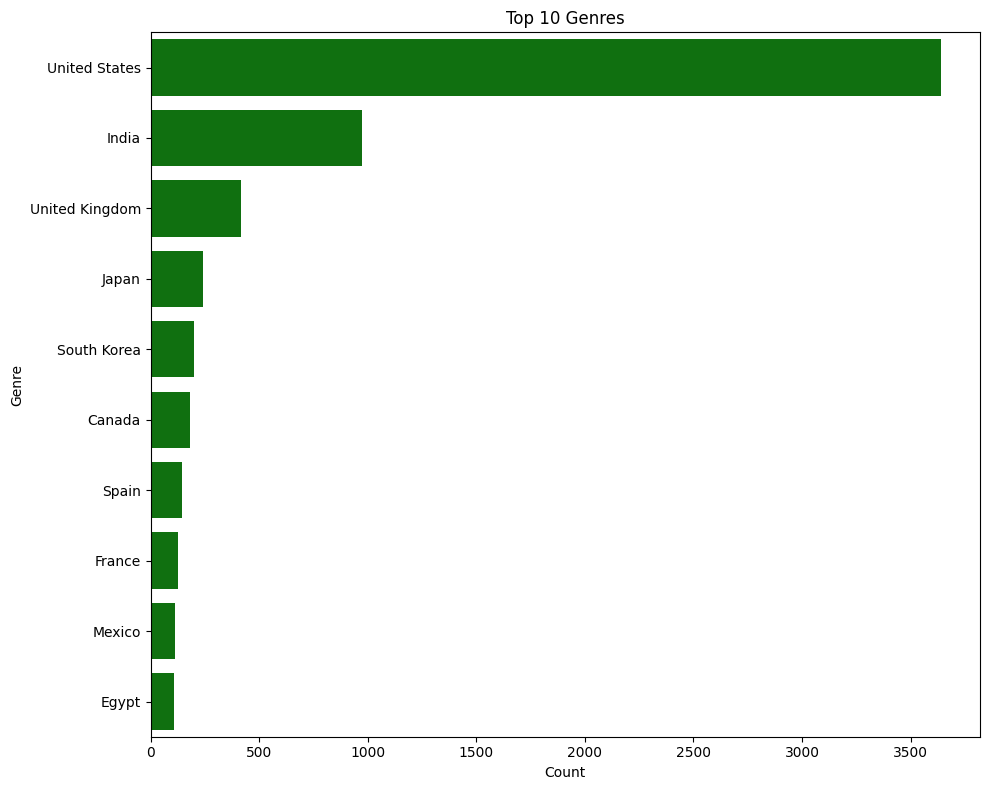

In [68]:
sns.barplot(y=top_10.index,x=top_10.values,color="green")
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Countries")
plt.ylabel("Number of titles")
plt.show()


## Top 10 Genere

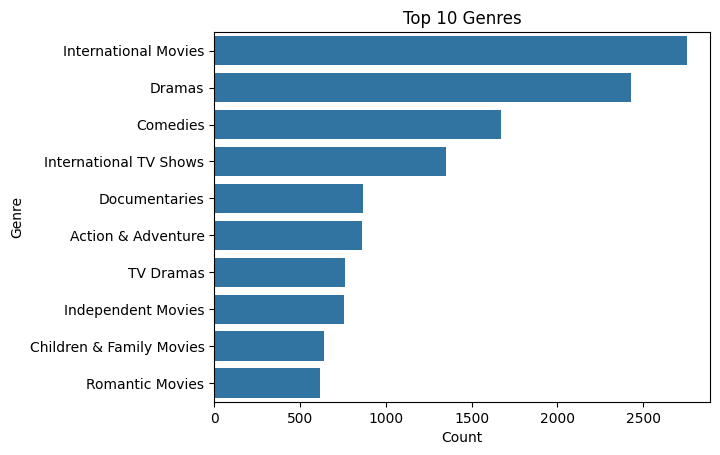

In [65]:
from collections import Counter
genres = df['listed_in'].str.split(', ')
flat_genres = [item for sublist in genres.dropna() for item in sublist]
top_genres = Counter(flat_genres).most_common(10)

genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=genres_df)
plt.title("Top 10 Genres")
plt.show()

##  Number of Netflix Titles Added Over the Years

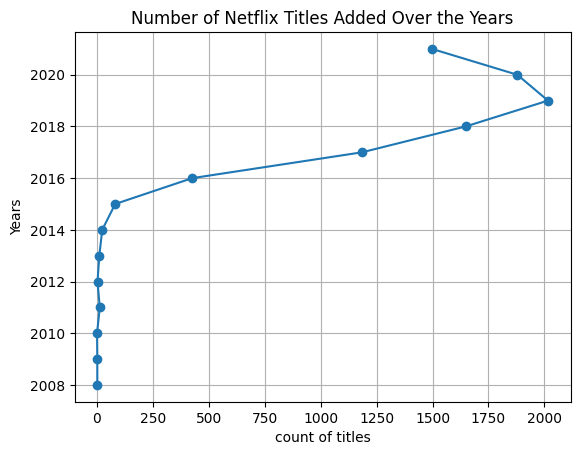

In [81]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
count=df["year_added"].value_counts().sort_index()
plt.plot(count.values,count.index,marker='o')
plt.title("Number of Netflix Titles Added Over the Years")
plt.xlabel("count of titles")
plt.ylabel("Years")
plt.grid(True)

plt.show()

## Netflix Titles Added Over Years by Type

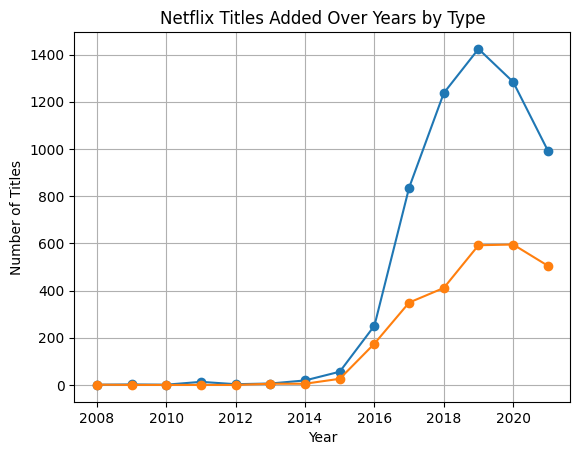

In [80]:
# Group by year and type
grouped = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.plot(grouped,marker="o")
plt.title("Netflix Titles Added Over Years by Type")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)

plt.show()
